# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data and Overview

In [ ]:
df = pd.read_csv('/content/shop_updated.csv')
df.head()

,SR NO,INV NO,Bill Code,Bill No.,Year,INV DATE,INVOICE TIME,MONTH,CUSTOMER,MOBILE,...,FINANCE NAME,PAYMENT METHOD,SFID,WALLET NAME,CREDIT,PURCHASE DATE,STATE CODE,STATE NAME,REMARK,STATUS
0,642,T104/2888/22-23,T104,2888,22-23,2023-03-13,8:28:32 PM,23-Mar,SHRAVAN INDUSTRIAL SOLUTIONS,8929414864,...,NaN,Cash + Credit,NaN,NaN,0,2023-03-13,27,MAHARASHTRA,NaN,B to B
1,660,T104/2903/22-23,T104,2903,22-23,2023-03-14,8:28:19 PM,23-Mar,SUMIT KUBAL,9867393689,...,NaN,Cash,NaN,GOOGLE PAY,0,2023-03-14,27,MAHARASHTRA,YBB VIVO S1 4/128 QSED,B to B
2,83,T104/2370/22-23,T104,2370,22-23,2023-01-10,1:35:37 PM,23-Jan,TOP 10 BHANDUP,9702451898,...,NaN,Sale Cash,NaN,NaN,0,2022-12-17,27,MAHARASHTRA,NaN,B to B
3,1907,T104/977/23-24,T104,977,23-24,2023-07-23,5:35:05 PM,23-Jul,DISHA ARTS,9821213853,...,NaN,Cash,NaN,GOOGLE PAY,0,2023-07-05,27,MAHARASHTRA,Y-BB-M32 6/128 AEDE,B to B
4,1896,T104/967/23-24,T104,967,23-24,2023-07-21,9:32:03 PM,23-Jul,AUDESH RAMAKANT YADAV,8097500194,...,NaN,Card,NaN,NaN,0,2023-07-05,27,MAHARASHTRA,Y UPGRADE SCHEME 8000,B to B


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SR NO                2478 non-null   int64  
 1   INV NO               2478 non-null   object 
 2   Bill Code            2478 non-null   object 
 3   Bill No.             2478 non-null   int64  
 4   Year                 2478 non-null   object 
 5   INV DATE             2478 non-null   object 
 6   INVOICE TIME         2478 non-null   object 
 7   MONTH                2478 non-null   object 
 8   CUSTOMER             2478 non-null   object 
 9   MOBILE               2478 non-null   int64  
 10  GST NO               416 non-null    object 
 11  PAN                  417 non-null    object 
 12  CATEGORY             2478 non-null   object 
 13  BRAND                2478 non-null   object 
 14  MODEL                2478 non-null   object 
 15  COLOR                2478 non-null   o

##Data Cleaning



In [ ]:
df = df.drop(['PROFIT','Cal','PROFIT_M','PURCHASE PRICE(PD)', 'SFID','STATE CODE','STATE NAME','CGST','SGST','IGST','BARCODE','IMEI'], axis=1)

In [ ]:
df.head()

,SR NO,INV NO,Bill Code,Bill No.,Year,INV DATE,INVOICE TIME,MONTH,CUSTOMER,MOBILE,...,CREDIT/DEBIT CARD,WALLET,FINANCE,FINANCE NAME,PAYMENT METHOD,WALLET NAME,CREDIT,PURCHASE DATE,REMARK,STATUS
0,642,T104/2888/22-23,T104,2888,22-23,2023-03-13,8:28:32 PM,23-Mar,SHRAVAN INDUSTRIAL SOLUTIONS,8929414864,...,0,0,0,NaN,Cash + Credit,NaN,0,2023-03-13,NaN,B to B
1,660,T104/2903/22-23,T104,2903,22-23,2023-03-14,8:28:19 PM,23-Mar,SUMIT KUBAL,9867393689,...,14000,15000,0,NaN,Cash,GOOGLE PAY,0,2023-03-14,YBB VIVO S1 4/128 QSED,B to B
2,83,T104/2370/22-23,T104,2370,22-23,2023-01-10,1:35:37 PM,23-Jan,TOP 10 BHANDUP,9702451898,...,0,0,0,NaN,Sale Cash,NaN,0,2022-12-17,NaN,B to B
3,1907,T104/977/23-24,T104,977,23-24,2023-07-23,5:35:05 PM,23-Jul,DISHA ARTS,9821213853,...,0,19600,0,NaN,Cash,GOOGLE PAY,0,2023-07-05,Y-BB-M32 6/128 AEDE,B to B
4,1896,T104/967/23-24,T104,967,23-24,2023-07-21,9:32:03 PM,23-Jul,AUDESH RAMAKANT YADAV,8097500194,...,28000,0,0,NaN,Card,NaN,0,2023-07-05,Y UPGRADE SCHEME 8000,B to B


In [ ]:
# Calculate missing values and percentage for each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df)

total_missing = missing_values.sum()
overall_missing_percentage = (total_missing / (len(df) * len(df.columns))) * 100
print("\nTotal Missing Values:", total_missing)
print("Overall Missing Percentage:", overall_missing_percentage)

                     Missing Values  Percentage
SR NO                             0    0.000000
INV NO                            0    0.000000
Bill Code                         0    0.000000
Bill No.                          0    0.000000
Year                              0    0.000000
INV DATE                          0    0.000000
INVOICE TIME                      0    0.000000
MONTH                             0    0.000000
CUSTOMER                          0    0.000000
MOBILE                            0    0.000000
GST NO                         2062   83.212268
PAN                            2061   83.171913
CATEGORY                          0    0.000000
BRAND                             0    0.000000
MODEL                             0    0.000000
COLOR                             0    0.000000
QUANTITY                          0    0.000000
SALE RATE                         0    0.000000
GST(%)                            0    0.000000
SALE PRICE(INC)                   0    0

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

,0
SR NO,0
INV NO,0
Bill Code,0
Bill No.,0
Year,0
INV DATE,0
INVOICE TIME,0
MONTH,0
CUSTOMER,0
MOBILE,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,SR NO,Bill No.,MOBILE,QUANTITY,SALE RATE,GST(%),SALE PRICE(INC),PURCHASE PRICE(INC),PROFIT_A,CASH,CHEQUE,CREDIT/DEBIT CARD,WALLET,FINANCE,CREDIT
count,2478.000000,2478.000000,2.478000e+03,2478.0,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000
mean,1240.544391,1349.022599,8.401443e+09,1.0,8021.984354,16.946731,9225.629944,8912.411437,519.766211,1952.563358,159.018563,2235.960452,1577.500404,1582.322437,1712.696529
std,715.734393,968.634231,2.349199e+09,0.0,11376.801579,4.225715,12898.175086,12696.083087,959.241786,4922.394446,2310.670475,7341.062325,4610.438631,6299.937703,8209.489448
min,1.000000,1.000000,0.000000e+00,1.0,0.850000,0.000000,1.000000,1.190000,-14063.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,621.250000,508.000000,8.108107e+09,1.0,847.460000,18.000000,1000.000000,848.980000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1240.500000,1092.500000,9.082177e+09,1.0,1694.920000,18.000000,2000.000000,1837.585000,290.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1859.750000,2447.750000,9.773530e+09,1.0,12711.860000,18.000000,14999.000000,14187.100000,729.000000,1300.000000,0.000000,0.000000,499.000000,0.000000,0.000000
max,2480.000000,3016.000000,9.987957e+09,1.0,122796.610000,18.000000,144900.000000,141678.430000,17839.030000,54999.000000,66000.000000,144900.000000,59999.000000,69499.000000,122810.000000


In [ ]:
df.dtypes

,0
SR NO,int64
INV NO,object
Bill Code,object
Bill No.,int64
Year,object
INV DATE,object
INVOICE TIME,object
MONTH,object
CUSTOMER,object
MOBILE,int64


##Feature Engineering

In [ ]:
#Converting Invoice Time into Hours, Minutes
df['INVOICE TIME'] = pd.to_datetime(df['INVOICE TIME'], errors='coerce')
df['Invoice Hours'] = df['INVOICE TIME'].dt.hour
df['Invoice Minutes'] = df['INVOICE TIME'].dt.minute
df['Invoice Time (HH:MM)'] = df['INVOICE TIME'].dt.strftime('%H:%M')
print(df[['INVOICE TIME', 'Invoice Hours', 'Invoice Minutes', 'Invoice Time (HH:MM)']].head())


         INVOICE TIME  Invoice Hours  Invoice Minutes Invoice Time (HH:MM)
0 2024-12-03 20:28:32             20               28                20:28
1 2024-12-03 20:28:19             20               28                20:28
2 2024-12-03 13:35:37             13               35                13:35
3 2024-12-03 17:35:05             17               35                17:35
4 2024-12-03 21:32:03             21               32                21:32


<ipython-input-12-5b694c2df38f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['INVOICE TIME'] = pd.to_datetime(df['INVOICE TIME'], errors='coerce')


In [ ]:
# Time Differnce between PPURCHASE DATE and INVOICE DATE
df['PURCHASE DATE'] = pd.to_datetime(df['PURCHASE DATE'])
df['INV DATE'] = pd.to_datetime(df['INV DATE'])
df['Time Difference'] = (df['INV DATE'] - df['PURCHASE DATE']).dt.days
df['Time Difference']

,Time Difference
0,0
1,0
2,24
3,18
4,16
...,...
2473,0
2474,0
2475,0
2476,58


In [ ]:
# Made customers as new or old based on purchase date
threshold_days = 30
df['Customer Type'] = np.where(df['Time Difference'] <= threshold_days, 'New', 'Old')
df.head(10)

,SR NO,INV NO,Bill Code,Bill No.,Year,INV DATE,INVOICE TIME,MONTH,CUSTOMER,MOBILE,...,WALLET NAME,CREDIT,PURCHASE DATE,REMARK,STATUS,Invoice Hours,Invoice Minutes,Invoice Time (HH:MM),Time Difference,Customer Type
0,642,T104/2888/22-23,T104,2888,22-23,2023-03-13,2024-12-03 20:28:32,23-Mar,SHRAVAN INDUSTRIAL SOLUTIONS,8929414864,...,0,0,2023-03-13,0,B to B,20,28,20:28,0,New
1,660,T104/2903/22-23,T104,2903,22-23,2023-03-14,2024-12-03 20:28:19,23-Mar,SUMIT KUBAL,9867393689,...,GOOGLE PAY,0,2023-03-14,YBB VIVO S1 4/128 QSED,B to B,20,28,20:28,0,New
2,83,T104/2370/22-23,T104,2370,22-23,2023-01-10,2024-12-03 13:35:37,23-Jan,TOP 10 BHANDUP,9702451898,...,0,0,2022-12-17,0,B to B,13,35,13:35,24,New
3,1907,T104/977/23-24,T104,977,23-24,2023-07-23,2024-12-03 17:35:05,23-Jul,DISHA ARTS,9821213853,...,GOOGLE PAY,0,2023-07-05,Y-BB-M32 6/128 AEDE,B to B,17,35,17:35,18,New
4,1896,T104/967/23-24,T104,967,23-24,2023-07-21,2024-12-03 21:32:03,23-Jul,AUDESH RAMAKANT YADAV,8097500194,...,0,0,2023-07-05,Y UPGRADE SCHEME 8000,B to B,21,32,21:32,16,New
5,23,T104/2314/22-23,T104,2314,22-23,2023-01-04,2024-12-03 12:33:36,23-Jan,S P TECHNOLOGIES,7738004038,...,GOOGLE PAY,0,2022-03-15,0,B to B,12,33,12:33,295,Old
6,570,T104/2821/22-23,T104,2821,22-23,2023-03-05,2024-12-03 13:43:34,23-Mar,TOP-10 [CHEMBUR EAST],9152667998,...,0,24492,2022-12-21,0,B to F,13,43,13:43,74,Old
7,54,T104/2344/22-23,T104,2344,22-23,2023-01-07,2024-12-03 20:50:42,23-Jan,TOP-10 [KURLA WEST],9197694404,...,0,24920,2022-12-21,0,B to F,20,50,20:50,17,New
8,2178,T104/1236/23-24,T104,1236,23-24,2023-08-20,2024-12-03 14:02:28,23-Aug,GAURAV,8369496744,...,GOOGLE PAY,0,2023-08-19,0,B to B,14,2,14:02,1,New
9,1569,T104/648/23-24,T104,648,23-24,2023-06-14,2024-12-03 18:43:08,23-Jun,TOP-10 [GHATKOPAR EAST 1],9892565477,...,0,26173,2023-05-15,Y RS 2000 UPGRADE SCHEME,B to F,18,43,18:43,30,New


In [ ]:
df['CATEGORY'].unique()

array(['MOBILE', 'TABLET', 'CABLE', 'SMART WATCH', 'DEMO', 'BLUETOOTH',
       'TWS', 'ADAPTER', 'NECKBAND', 'BAG', 'POWER BANK', 'CHARGER',
       'SMART WATCH S', 'EARPHONE', 'CONNECTOR', 'PEN DRIVE',
       'MEMORY CARD', 'CAR CHARGER', 'SMART ADAPTER', 'PORTABLE SPEAKER',
       'ACCESSORIES', 'TABLET S', 'LAPTOP'], dtype=object)

In [ ]:
df['CATEGORY'] = df['CATEGORY'].replace({
    'DEMO': 'MOBILES & TABLETS',
    'MOBILE': 'MOBILES & TABLETS',
    'TABLET': 'MOBILES & TABLETS',
    'TABLET S': 'MOBILES & TABLETS',
    'TWS': 'MOBILES & TABLETS',
    'ACCESSORIES': 'MOBILE ACCESSORIES',
    'ADAPTER': 'MOBILE ACCESSORIES',
    'CABLE': 'MOBILE ACCESSORIES',
    'CAR CHARGER': 'MOBILE ACCESSORIES',
    'CHARGER': 'MOBILE ACCESSORIES',
    'CONNECTOR': 'MOBILE ACCESSORIES',
    'SMART ADAPTER': 'MOBILE ACCESSORIES',
    'BLUETOOTH': 'ELECTRONIC GADGETS',
    'EARPHONE': 'ELECTRONIC GADGETS',
    'LAPTOP': 'ELECTRONIC GADGETS',
    'NECKBAND': 'ELECTRONIC GADGETS',
    'SMART WATCH': 'ELECTRONIC GADGETS',
    'SMART WATCH S': 'ELECTRONIC GADGETS',
    'POWER BANK': 'ELECTRONIC GADGETS',
    'PORTABLE SPEAKER': 'ELECTRONIC GADGETS',
    'BAG': 'OTHERS',
    'MEMORY CARD': 'OTHERS',
    'PEN DRIVE': 'OTHERS'
})
print(df['CATEGORY'].value_counts())

CATEGORY
MOBILES & TABLETS     1273
ELECTRONIC GADGETS     954
MOBILE ACCESSORIES     214
OTHERS                  37
Name: count, dtype: int64


In [ ]:
df['STATUS'] = df['STATUS'].replace('B to B', 'B to C')
df['STATUS'] = df['STATUS'].replace('B to F', 'B to B')
df["STATUS"].unique()

array(['B to C', 'B to B'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   SR NO                 2478 non-null   int64         
 1   INV NO                2478 non-null   object        
 2   Bill Code             2478 non-null   object        
 3   Bill No.              2478 non-null   int64         
 4   Year                  2478 non-null   object        
 5   INV DATE              2478 non-null   datetime64[ns]
 6   INVOICE TIME          2478 non-null   datetime64[ns]
 7   MONTH                 2478 non-null   object        
 8   CUSTOMER              2478 non-null   object        
 9   MOBILE                2478 non-null   int64         
 10  GST NO                2478 non-null   object        
 11  PAN                   2478 non-null   object        
 12  CATEGORY              2478 non-null   object        
 13  BRAND             

#Customer Segmentation


In [ ]:
#RFM for each brand and category
today_date = pd.to_datetime('today')
rfm_brand_category = df.groupby(['BRAND', 'CATEGORY']).agg({
    'INV DATE': lambda x: (today_date - x.max()).days,
    'INV NO': 'count',
    'SALE PRICE(INC)': 'sum'
})

rfm_brand_category.rename(columns={
    'INV DATE': 'Recency',
    'INV NO': 'Frequency',
    'SALE PRICE(INC)': 'MonetaryValue'
}, inplace=True)

rfm_brand_category

Recency  Frequency  MonetaryValue
BRAND      CATEGORY                                             
APPLE      ELECTRONIC GADGETS      435          5           9500
           MOBILE ACCESSORIES      445         38          58103
           MOBILES & TABLETS       435         44        2899536
BOAT       ELECTRONIC GADGETS      430        320         402728
CONEKT     ELECTRONIC GADGETS      460          1           1500
DEFY       ELECTRONIC GADGETS      449          9              9
FIRE BOLTT ELECTRONIC GADGETS      440         82         160339
GIZMORE    ELECTRONIC GADGETS      630          9           4999
HP         ELECTRONIC GADGETS      600          1          40000
           OTHERS                  460          1              1
INTEX      ELECTRONIC GADGETS      434        126           6313
ITEL       MOBILES & TABLETS       442         30          50676
MI         ELECTRONIC GADGETS      431         17          21693
           MOBILE ACCESSORIES      463         15           6091
           MOBILES & TABLETS       434        102        1250494
MICROMAX   MOBILES & TABLETS       435          7           7900
MINIX      ELECTRONIC GADGETS      432         42          70797
MOTOROLA   MOBILES & TABLETS       467          2          28100
NOISE      ELECTRONIC GADGETS      570          8          24798
           MOBILES & TABLETS       433          8          10446
NOKIA      MOBILES & TABLETS       431         92         225052
NOTHING    MOBILE ACCESSORIES      668          1           1950
           MOBILES & TABLETS       477          2          61999
OMTHING    ELECTRONIC GADGETS      544          3           5834
ONEPLUS    ELECTRONIC GADGETS      430         18          31858
           MOBILE ACCESSORIES      498         13          11306
           MOBILES & TABLETS       430        136        3210594
OPPO       ELECTRONIC GADGETS      473         12          22718
           MOBILES & TABLETS       430        325        5315828
POCO       MOBILES & TABLETS       440         13         121621
PORTRONICS ELECTRONIC GADGETS      430        109          87344
           MOBILE ACCESSORIES      430         76          30741
PTRON      ELECTRONIC GADGETS      440         88          35035
REALME     ELECTRONIC GADGETS      449          9          15648
           MOBILE ACCESSORIES      604          1            699
           MOBILES & TABLETS       450         53         794030
RIVERSONG  ELECTRONIC GADGETS      436         75          10107
           MOBILE ACCESSORIES      436         32           7017
SAMSUNG    ELECTRONIC GADGETS      459          7           4545
           MOBILE ACCESSORIES      452         28          31137
           MOBILES & TABLETS       434        234        3734423
SANDISK    OTHERS                  440         36          24431
SENNHEISER ELECTRONIC GADGETS      677          1            900
SONY       ELECTRONIC GADGETS      685          1           3000
STUFFCOOL  ELECTRONIC GADGETS      513          1           3500
SYSKA      ELECTRONIC GADGETS      433         10          18200
           MOBILE ACCESSORIES      456          9           7039
TECNO      MOBILES & TABLETS       476         15         103164
VIVO       MOBILE ACCESSORIES      647          1            325
           MOBILES & TABLETS       432        210        3887043

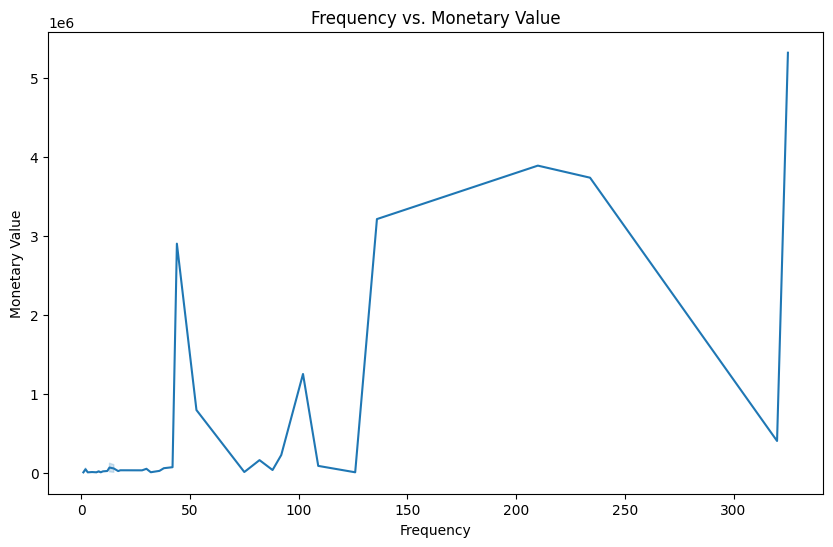

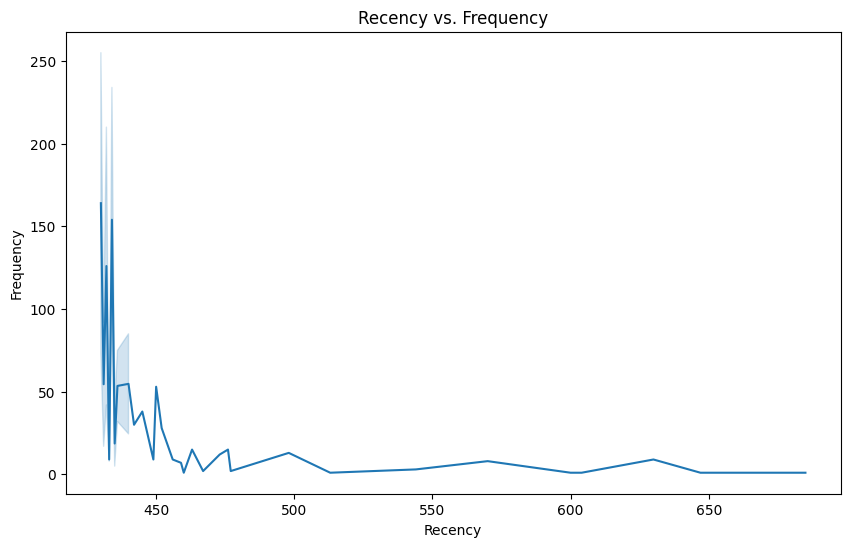

In [ ]:
# Plot Frequency vs. Monetary Value
plt.figure(figsize=(10, 6))
sns.lineplot(x='Frequency', y='MonetaryValue', data=rfm_brand_category) # Changed to lineplot
plt.title('Frequency vs. Monetary Value')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.show()
# Plot Recency vs. Frequency
plt.figure(figsize=(10, 6))
sns.lineplot(x='Recency', y='Frequency', data=rfm_brand_category) # Changed to lineplot
plt.title('Recency vs. Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

In [ ]:
finance_counts = df["FINANCE NAME"].value_counts()
print("Finance Counts:")
print(finance_counts)

Finance Counts:
FINANCE NAME
0                              2262
BAJAJ FINANCE                   113
SAMSUNG SURE                     43
HOME CREDIT                      18
ICICI BANK CONSUMER FINANCE      18
HDB FINANCIAL                    12
HDFC BANK LTD                    10
CAPITAL FIRST                     2
Name: count, dtype: int64


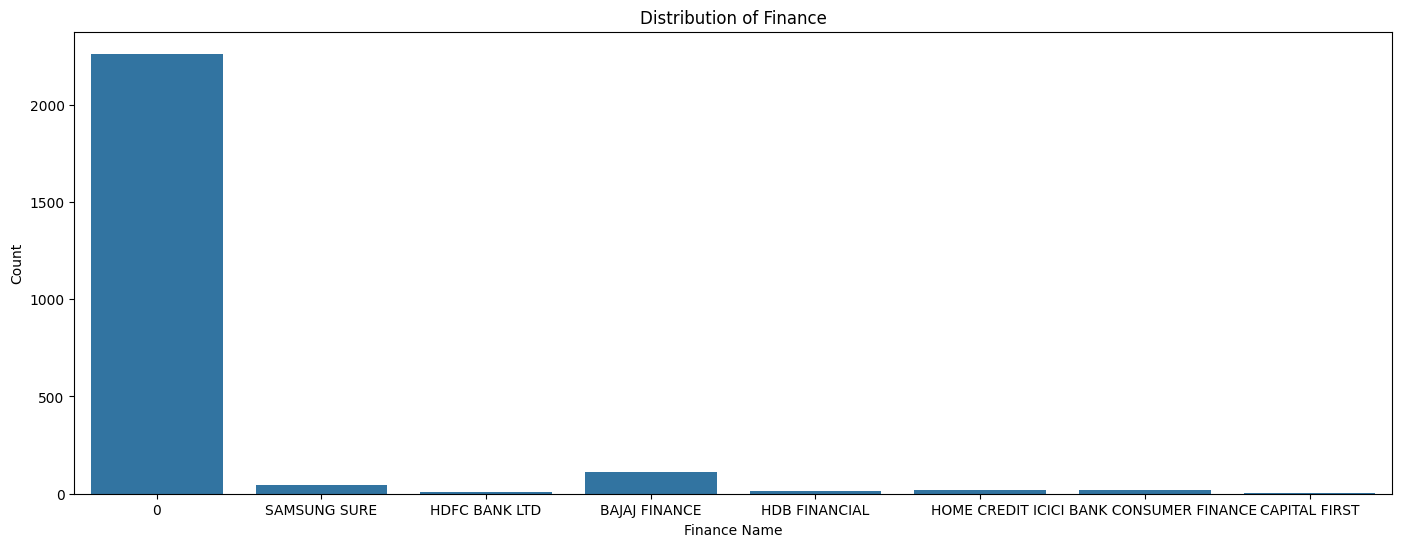

In [ ]:
# Distribution of Finance
plt.figure(figsize=(17,6))
sns.countplot(x='FINANCE NAME', data=df)
plt.title('Distribution of Finance')
plt.xlabel('Finance Name')
plt.ylabel('Count')
plt.show()

In [ ]:
payment_method_counts = df["PAYMENT METHOD"].value_counts()
print("Payment Method Counts:")
print(payment_method_counts)

Payment Method Counts:
PAYMENT METHOD
Cash                         768
Digital Payment              478
Card                         338
Sale Cash                    276
Cash + Credit                211
Bank Transfer                173
Cash + Finance               114
Digital Payment + Finance     67
Card + Finance                27
Cheque                        19
Finance                        7
Name: count, dtype: int64


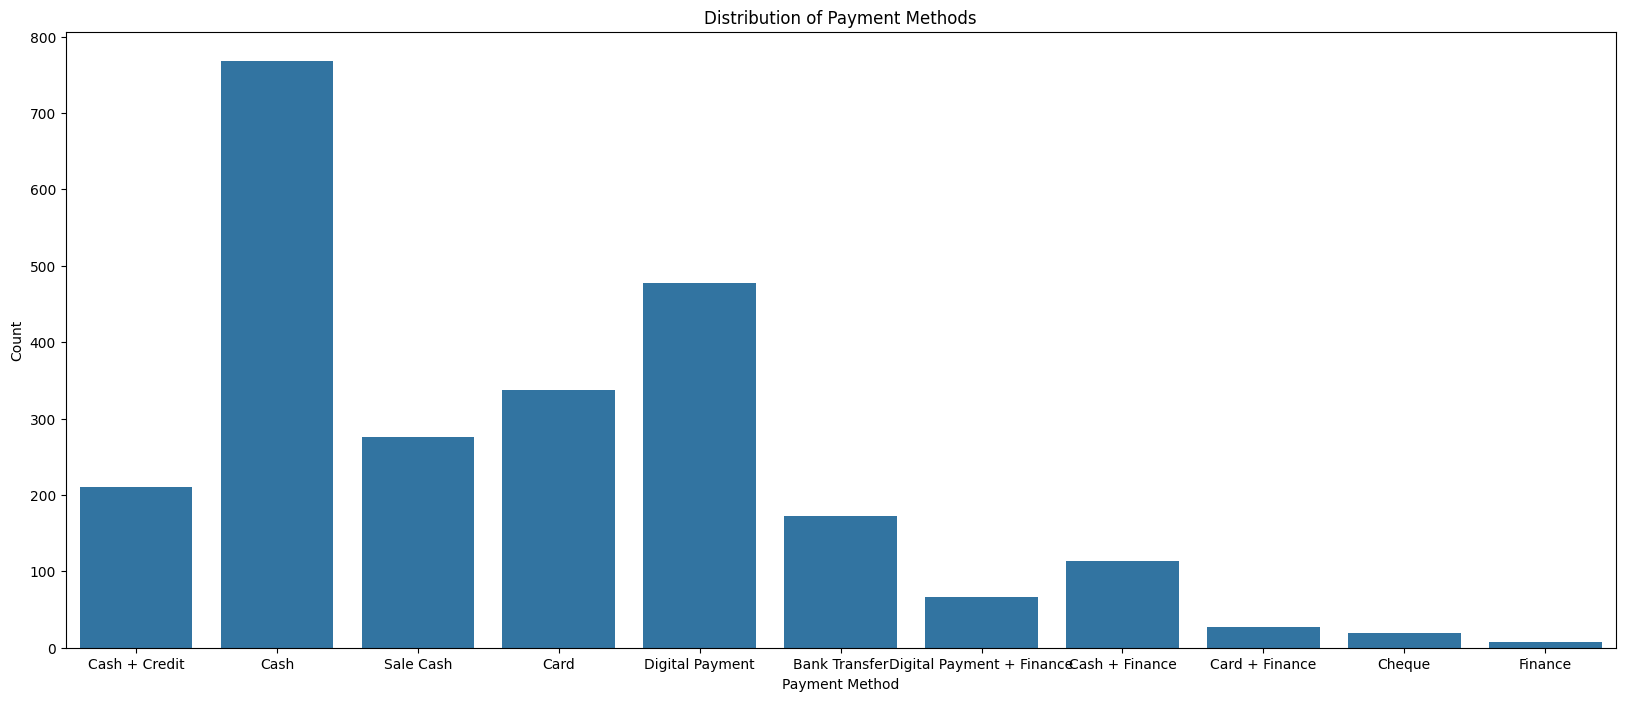

In [ ]:
# Distribution of Payment Methods
plt.figure(figsize=(20,8))
sns.countplot(x='PAYMENT METHOD', data=df)
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

In [ ]:
brand_counts = df["BRAND"].value_counts()
print("Brand Counts:")
print(brand_counts)

Brand Counts:
BRAND
OPPO          337
BOAT          320
SAMSUNG       269
VIVO          211
PORTRONICS    185
ONEPLUS       167
MI            134
INTEX         126
RIVERSONG     107
NOKIA          92
PTRON          88
APPLE          87
FIRE BOLTT     82
REALME         63
MINIX          42
SANDISK        36
ITEL           30
SYSKA          19
NOISE          16
TECNO          15
POCO           13
GIZMORE         9
DEFY            9
MICROMAX        7
OMTHING         3
NOTHING         3
MOTOROLA        2
HP              2
SONY            1
SENNHEISER      1
CONEKT          1
STUFFCOOL       1
Name: count, dtype: int64


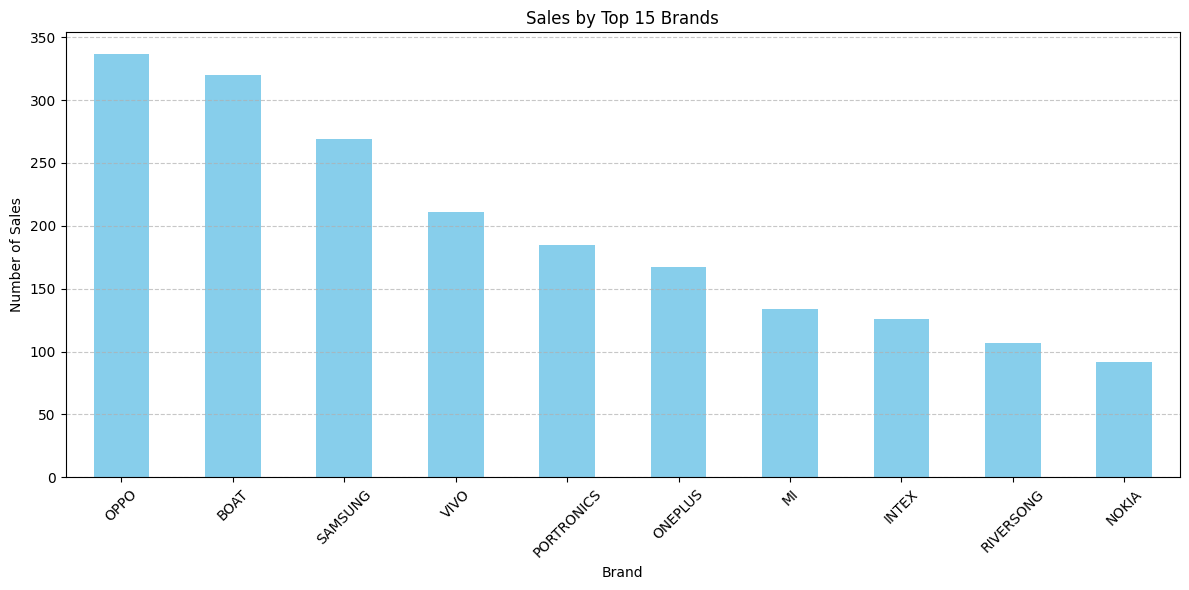

In [ ]:
# Top 15 Brands
top_15_brands = df['BRAND'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
top_15_brands.plot(kind='bar', color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Number of Sales')
plt.title('Sales by Top 15 Brands')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


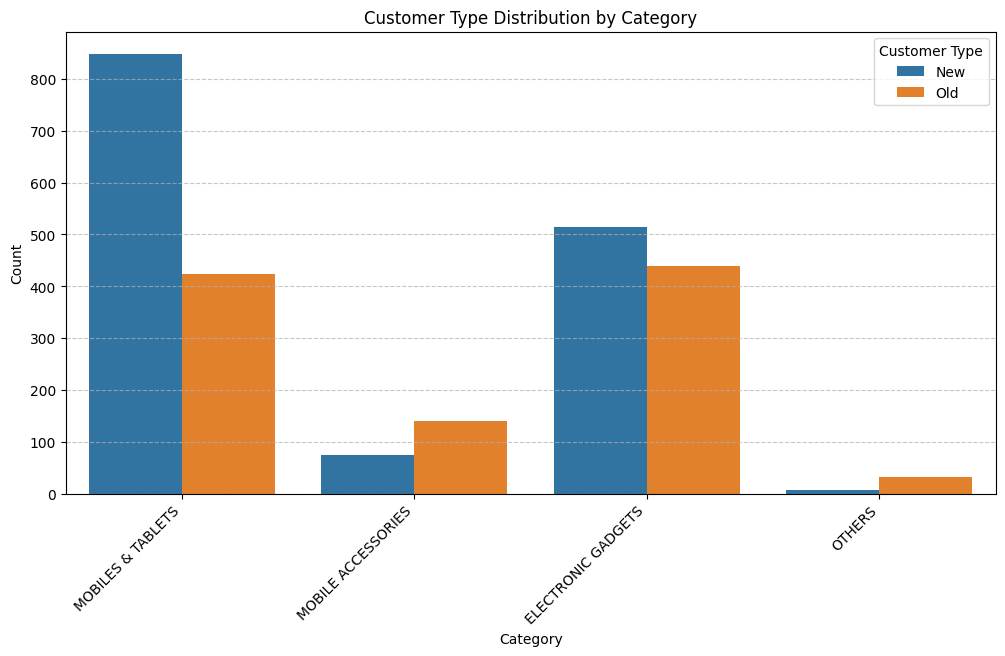

In [ ]:
# Customer Type distribution within each category
plt.figure(figsize=(12, 6))
sns.countplot(x='CATEGORY', hue='Customer Type', data=df)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Customer Type Distribution by Category")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##Product Segemenation

In [ ]:
df['CATEGORY'].value_counts()

,count
CATEGORY,
MOBILES & TABLETS,1273
ELECTRONIC GADGETS,954
MOBILE ACCESSORIES,214
OTHERS,37


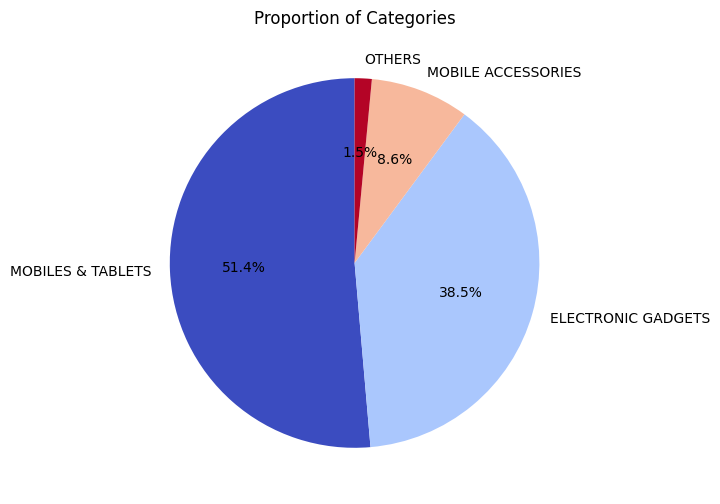

In [ ]:
# Pie chart for CATEGORY
category_proportions = df['CATEGORY'].value_counts(normalize=True)
plt.figure(figsize=(8, 6))
category_proportions.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='coolwarm')
plt.title('Proportion of Categories')
plt.ylabel('')
plt.show()


In [ ]:
#maximun profit based on category
max_profit_by_category = df.groupby('CATEGORY')['SALE PRICE(INC)'].sum()
max_profit_by_category

,SALE PRICE(INC)
CATEGORY,
ELECTRONIC GADGETS,981365
MOBILE ACCESSORIES,154408
MOBILES & TABLETS,21700906
OTHERS,24432


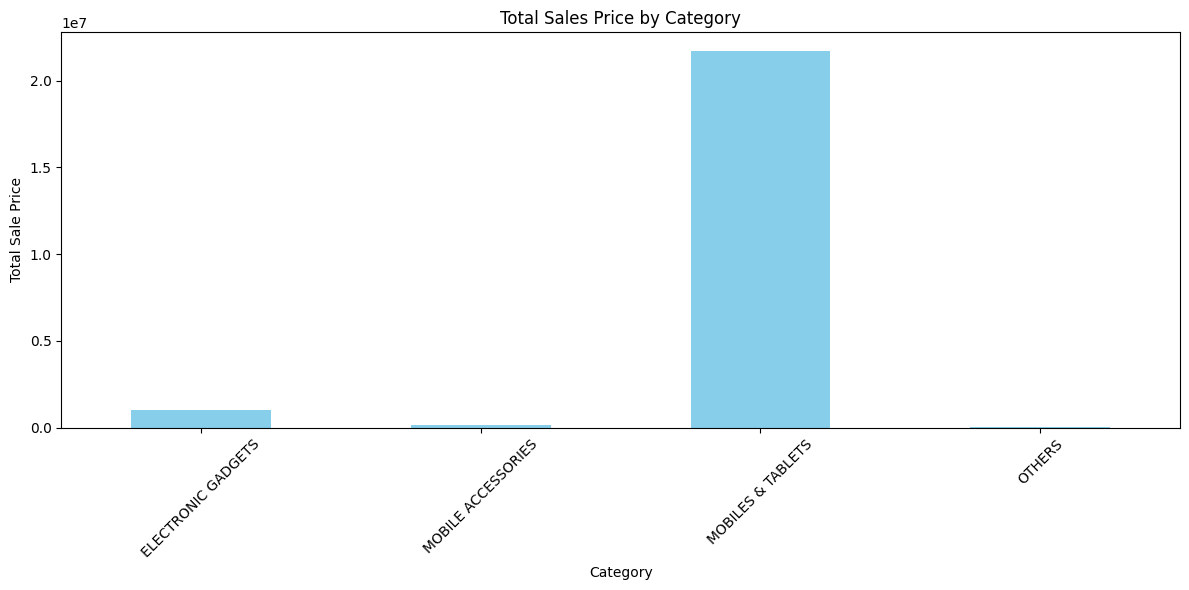

In [ ]:
#max_profit_by_category
plt.figure(figsize=(12, 6))
max_profit_by_category.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Sale Price')
plt.title('Total Sales Price by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

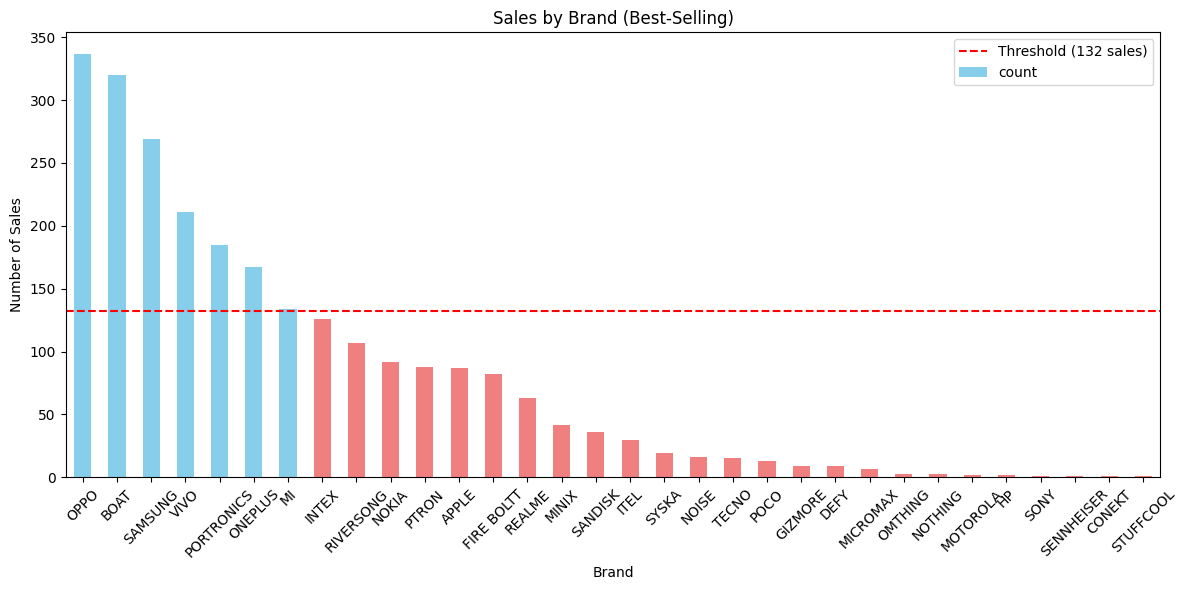

In [ ]:
threshold = brand_counts.quantile(0.8)
df['Best_Selling'] = df['BRAND'].apply(lambda brand: 'Yes' if brand_counts[brand] >= threshold else 'No')
plt.figure(figsize=(12, 6))
brand_counts.plot(kind='bar', color=['skyblue' if count >= threshold else 'lightcoral' for count in brand_counts])
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold:.0f} sales)')
plt.xlabel('Brand')
plt.ylabel('Number of Sales')
plt.title('Sales by Brand (Best-Selling)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

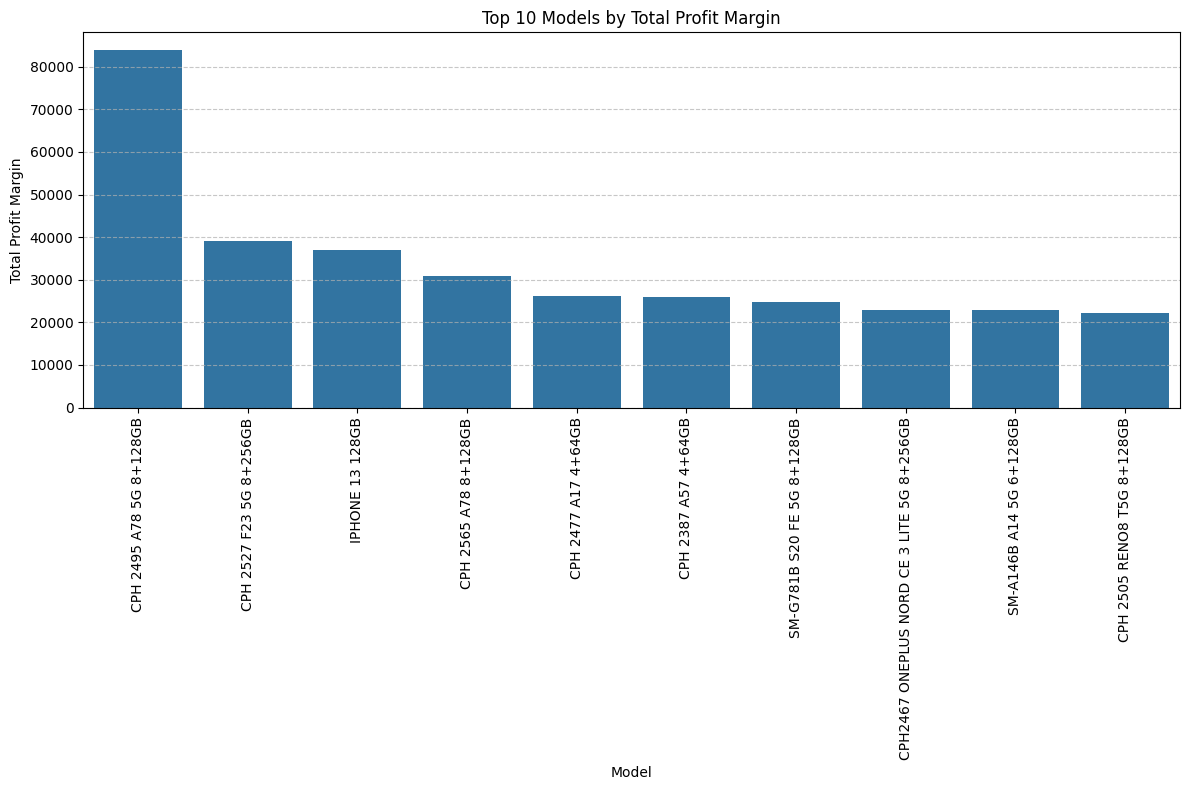

In [ ]:
model_profit = df.groupby('MODEL')['PROFIT_A'].sum()
top_10_models = model_profit.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_models.index, y=top_10_models.values)
plt.xlabel('Model')
plt.ylabel('Total Profit Margin')
plt.title('Top 10 Models by Total Profit Margin')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##Sales Trend Analysis

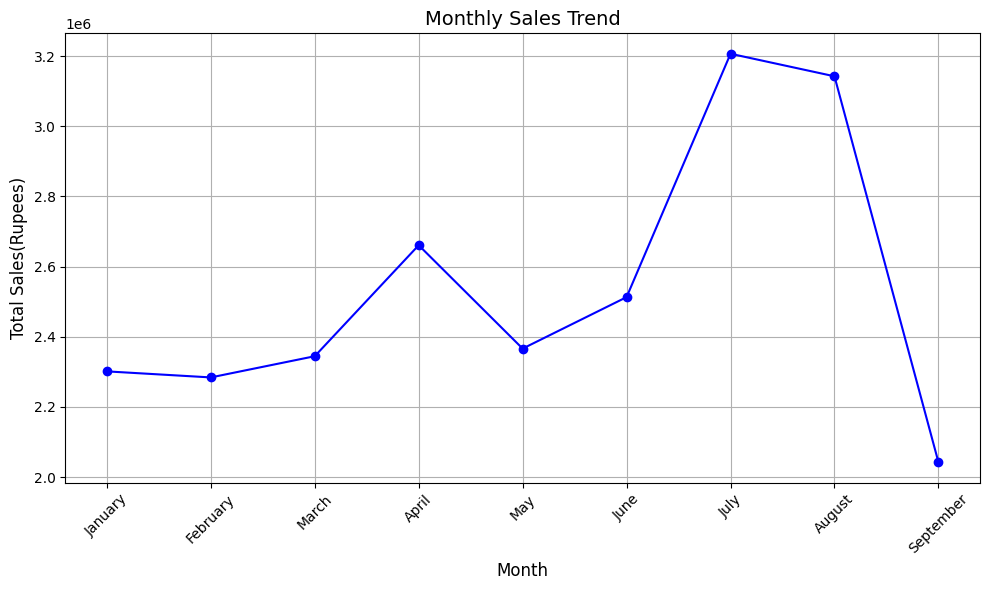

In [ ]:
df['INV DATE'] = pd.to_datetime(df['INV DATE'])
df['TOTAL SALES'] = df['SALE PRICE(INC)'] * df['QUANTITY']
df['Month'] = df['INV DATE'].dt.strftime('%B')
monthly_sales = df.groupby('Month')['TOTAL SALES'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('Month')

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['TOTAL SALES'], marker='o', color='b')
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales(Rupees)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

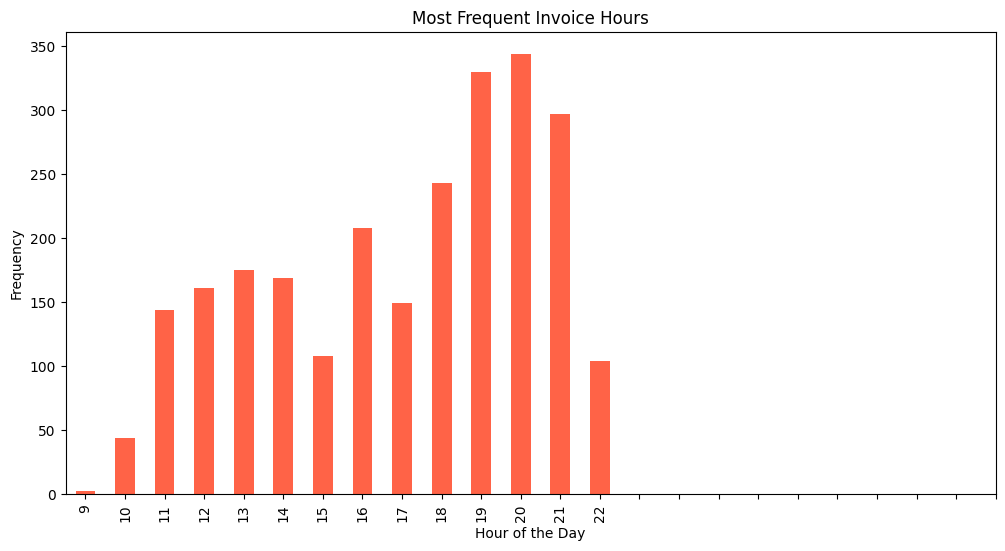

In [ ]:
peak_hours = df['Invoice Hours'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
peak_hours.plot(kind='bar', color='tomato')
plt.title('Most Frequent Invoice Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(range(0, 24))
plt.show()

In [ ]:
#Average purchase value for each category
avg_purchase_by_category = df.groupby('CATEGORY')['SALE PRICE(INC)'].mean().round(2)
avg_purchase_by_category

,SALE PRICE(INC)
CATEGORY,
ELECTRONIC GADGETS,1028.68
MOBILE ACCESSORIES,721.53
MOBILES & TABLETS,17047.06
OTHERS,660.32


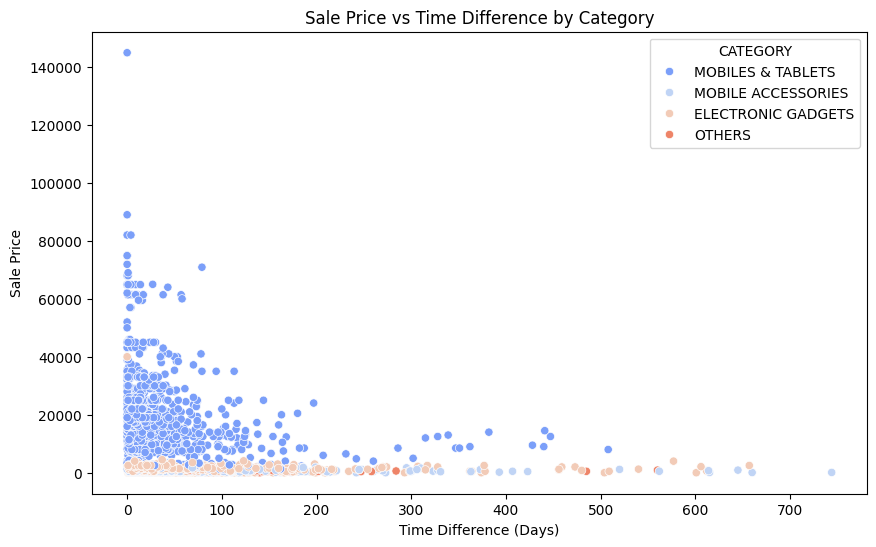

In [ ]:
# Scatter plot for 'SALE PRICE(INC)' vs 'Time Difference' colored by 'CATEGORY'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time Difference', y='SALE PRICE(INC)', hue='CATEGORY', data=df, palette='coolwarm')
plt.title('Sale Price vs Time Difference by Category')
plt.xlabel('Time Difference (Days)')
plt.ylabel('Sale Price')
plt.show()


##Payment Method Insights

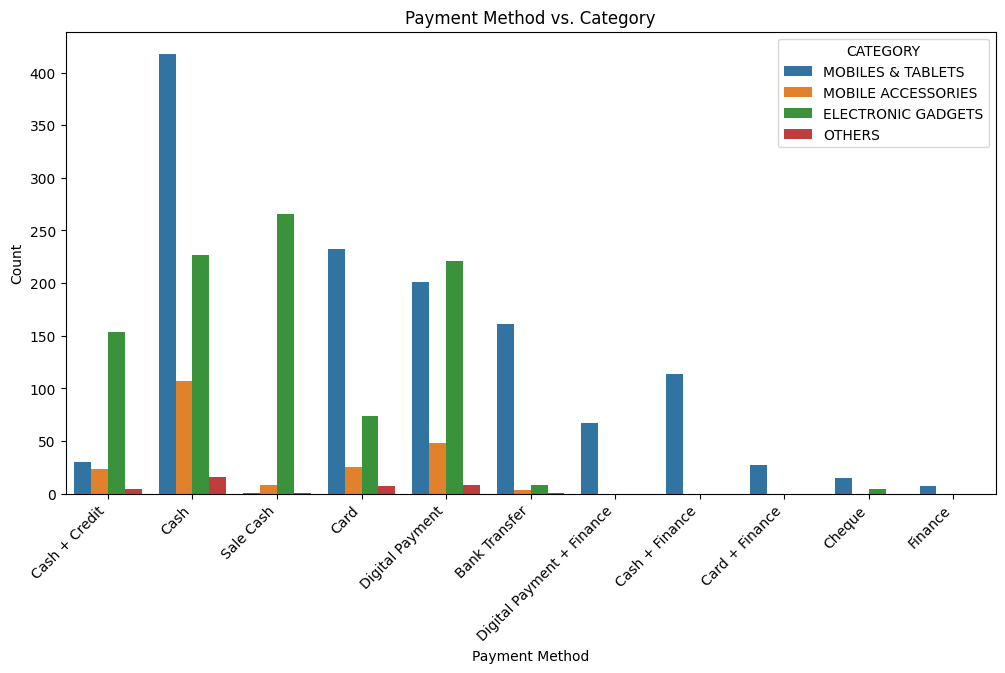

In [ ]:
#Payment Method vs. Category
plt.figure(figsize=(12, 6))
sns.countplot(x='PAYMENT METHOD', hue='CATEGORY', data=df)
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.title("Payment Method vs. Category")
plt.xticks(rotation=45, ha='right')
plt.show()

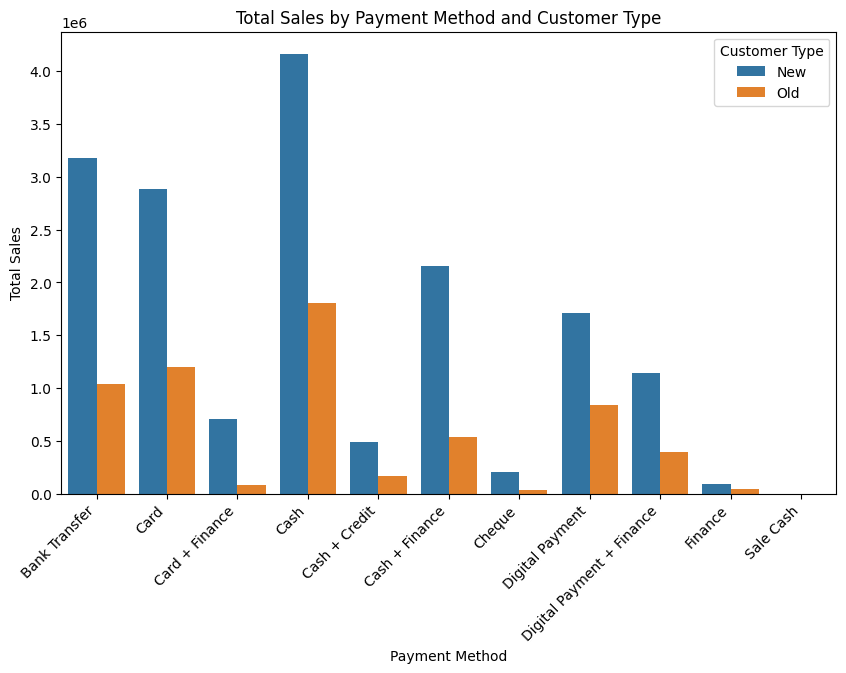

In [ ]:
#Total Sales by Payment Method and Customer Type
sales_by_payment_customer = df.groupby(['PAYMENT METHOD', 'Customer Type'])['TOTAL SALES'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='PAYMENT METHOD', y='TOTAL SALES', hue='Customer Type', data=sales_by_payment_customer)
plt.xlabel("Payment Method")
plt.ylabel("Total Sales")
plt.title("Total Sales by Payment Method and Customer Type")
plt.xticks(rotation=45, ha='right')
plt.show()


## Break Even Point


In [ ]:
category_sales = df.groupby('CATEGORY').agg(
    total_sales=('SALE PRICE(INC)', 'sum'),
    total_units_sold=('QUANTITY', 'sum'),
    total_cost_of_goods_sold=('PURCHASE PRICE(INC)', 'sum')
).reset_index()


category_sales['selling_price_per_unit'] = category_sales['total_sales'] / category_sales['total_units_sold']
category_sales['variable_cost_per_unit'] = category_sales['total_cost_of_goods_sold'] / category_sales['total_units_sold']

fixed_costs = 150000

category_sales['break_even_units'] = fixed_costs / (
    category_sales['selling_price_per_unit'] - category_sales['variable_cost_per_unit']
)
print(category_sales[['CATEGORY', 'selling_price_per_unit', 'variable_cost_per_unit', 'break_even_units']])
category_sales.to_csv("category_bep_analysis.csv", index=False)


             CATEGORY  selling_price_per_unit  variable_cost_per_unit  \
0  ELECTRONIC GADGETS             1028.684486              934.548008   
1  MOBILE ACCESSORIES              721.532710              604.762477   
2   MOBILES & TABLETS            17047.058916            16531.950723   
3              OTHERS              660.324324              508.224324   

   break_even_units  
0       1593.431188  
1       1284.573948  
2        291.200959  
3        986.193294  


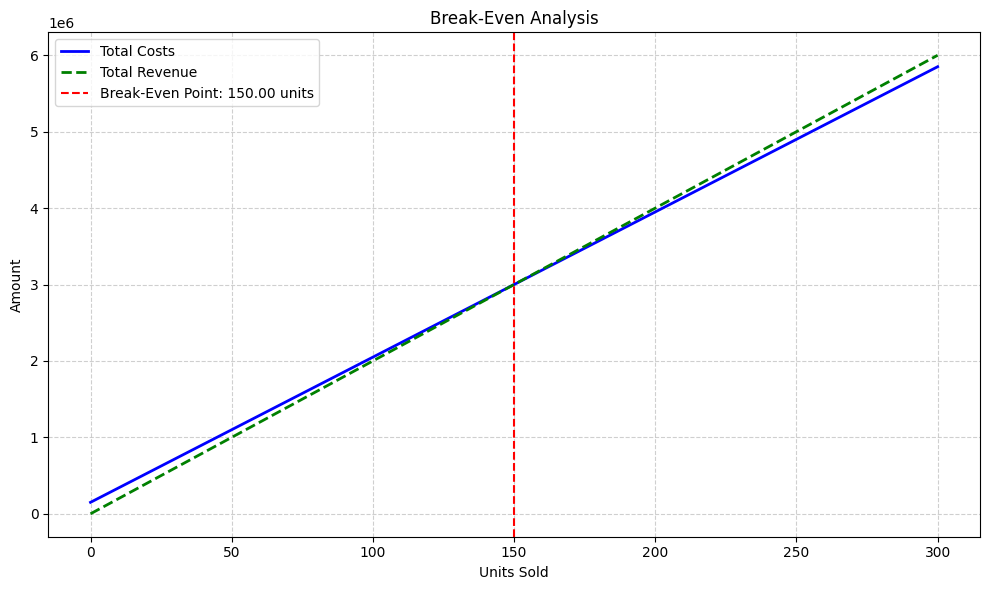

Break-Even Point: 150.00 units


In [ ]:
variable_costs_per_unit = 19000
selling_price_per_unit = 20000

break_even_point = fixed_costs / (selling_price_per_unit - variable_costs_per_unit)
units_sold = np.linspace(0, 2 * break_even_point, 100)
total_costs = fixed_costs + (variable_costs_per_unit * units_sold)
total_revenue = selling_price_per_unit * units_sold

plt.figure(figsize=(10, 6))
plt.plot(units_sold, total_costs, label='Total Costs', color='blue', linewidth=2)
plt.plot(units_sold, total_revenue, label='Total Revenue', color='green', linestyle='--', linewidth=2)
plt.axvline(x=break_even_point, color='red', linestyle='--', label=f'Break-Even Point: {break_even_point:.2f} units')

plt.xlabel('Units Sold')
plt.ylabel('Amount')
plt.title('Break-Even Analysis')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
print(f"Break-Even Point: {break_even_point:.2f} units")


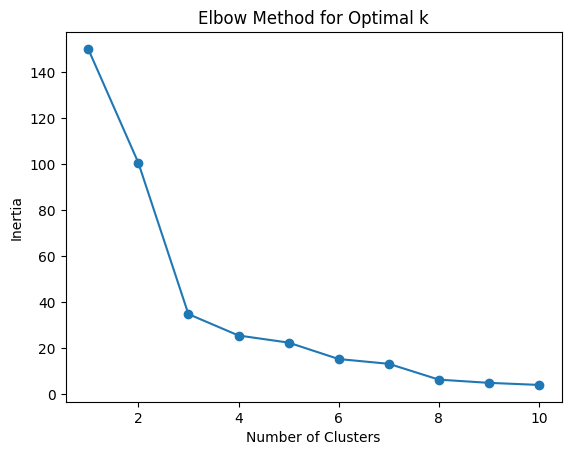

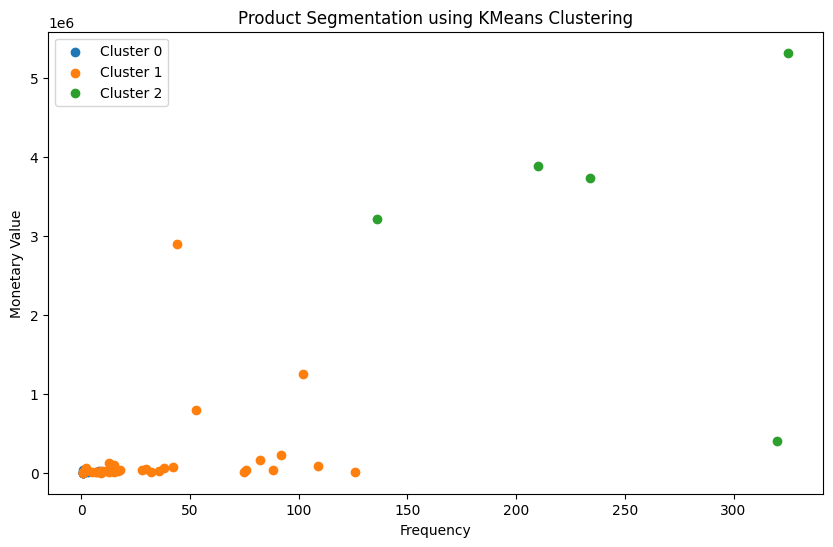

Cluster 0:
          Recency  Frequency  MonetaryValue  Cluster
count    9.000000   9.000000       9.000000      9.0
mean   625.000000   2.888889    9167.222222      0.0
std     49.135018   3.257470   13837.591091      0.0
min    544.000000   1.000000     325.000000      0.0
25%    600.000000   1.000000     900.000000      0.0
50%    630.000000   1.000000    3000.000000      0.0
75%    668.000000   3.000000    5834.000000      0.0
max    685.000000   9.000000   40000.000000      0.0


Cluster 1:
          Recency   Frequency  MonetaryValue  Cluster
count   36.000000   36.000000   3.600000e+01     36.0
mean   448.444444   34.083333   1.729997e+05      1.0
std     19.851512   35.743831   5.252514e+05      0.0
min    430.000000    1.000000   1.000000e+00      1.0
25%    434.000000    8.750000   7.684750e+03      1.0
50%    440.000000   16.000000   2.357450e+04      1.0
75%    459.250000   46.250000   6.419850e+04      1.0
max    513.000000  126.000000   2.899536e+06      1.0


Cluster 2:


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

rfm_data = rfm_brand_category[['Recency', 'Frequency', 'MonetaryValue']]

scaler = StandardScaler()
scaled_rfm_data = scaler.fit_transform(rfm_data)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_rfm_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_rfm_data)
rfm_brand_category['Cluster'] = clusters
plt.figure(figsize=(10, 6))
for cluster in range(3):
    plt.scatter(
        rfm_brand_category[rfm_brand_category['Cluster'] == cluster]['Frequency'],
        rfm_brand_category[rfm_brand_category['Cluster'] == cluster]['MonetaryValue'],
        label=f'Cluster {cluster}'
    )
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.title('Product Segmentation using KMeans Clustering')
plt.legend()
plt.show()

for cluster in range(3):
    print(f"Cluster {cluster}:")
    print(rfm_brand_category[rfm_brand_category['Cluster'] == cluster].describe())
    print("\n")
